In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from datetime import datetime
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Importing the datasets

In [2]:
# Importing the dataset
train_data = pd.read_csv("train.csv")
test_data=pd.read_csv('test.csv')
df_subm=pd.read_csv('sample_submission.csv')

C:\Users\AyushiBansal\Anaconda3\envs\TestEnv\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train_data.shape, test_data.shape

((85895, 32), (57239, 31))

In [4]:
train_data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [5]:
my_submission = pd.DataFrame({'ID': test_data.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [6]:
my_submission.shape

(57239, 1)

# Inspecting the data

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
ID                                   85895 non-null object
LICENSE ID                           85895 non-null int64
ACCOUNT NUMBER                       85895 non-null int64
SITE NUMBER                          85895 non-null int64
LEGAL NAME                           85895 non-null object
DOING BUSINESS AS NAME               85894 non-null object
ADDRESS                              85895 non-null object
CITY                                 85895 non-null object
STATE                                85895 non-null object
ZIP CODE                             85864 non-null object
WARD                                 36194 non-null float64
PRECINCT                             29194 non-null float64
WARD PRECINCT                        36195 non-null object
POLICE DISTRICT                      31883 non-null float64
LICENSE CODE                         85895 non-null int64
LICENSE

In [8]:
train_data.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE', 'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE', 'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'LICENSE STATUS'], dtype='object')

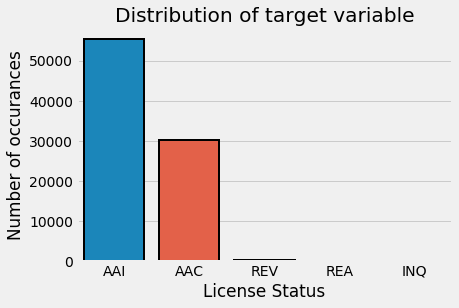

In [9]:
#Visualizing the distribution of target variable
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(6,4))
plt.title('Distribution of target variable')
sns.countplot(train_data['LICENSE STATUS'], linewidth=2, edgecolor='black')
plt.ylabel('Number of occurances');
plt.xlabel('License Status');
plt.show()

Distributions: By seeing the distributions we can have an idea how skewed is distribution in target variable i.e the dataset is highly imbalanced. There are techniques that can help the distributions be less skewed which will be implemented in this notebook.

In [10]:
# Studying the target variable
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [11]:
# The classes are heavily skewed we need to solve this issue.
round(train_data['LICENSE STATUS'].value_counts()/len(train_data) * 100,5)

AAI    64.49735
AAC    35.15921
REV     0.33762
REA     0.00349
INQ     0.00233
Name: LICENSE STATUS, dtype: float64

Note: Notice how imbalanced is our train dataset! Most of the license are category AAI(License was issued) as compared to the other classes: AAC, REV, REA & INQ which indeed states that the business license is not in valid condition. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most business are not having a valid license. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!
    
Since we have hardly any sample observations for the classes REA & INQ we not take those into consideration for classification.

In [12]:
#Dropping the records with License status as REA or INQ
indexREA = train_data[ train_data['LICENSE STATUS'] == 'REA'].index
indexINQ = train_data[ train_data['LICENSE STATUS'] == 'INQ'].index
train_data.drop(indexREA , inplace=True)
train_data.drop(indexINQ , inplace=True)

In [13]:
train_data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
Name: LICENSE STATUS, dtype: int64

In [14]:
train_data.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49699
PRECINCT                             56699
WARD PRECINCT                        49698
POLICE DISTRICT                      54010
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64657
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1287
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [15]:
test_data.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [16]:
train_data.nunique()

ID                                   85890
LICENSE ID                           85890
ACCOUNT NUMBER                       38895
SITE NUMBER                            177
LEGAL NAME                           38742
DOING BUSINESS AS NAME               41684
ADDRESS                              42143
CITY                                  1223
STATE                                   54
ZIP CODE                              2456
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49764
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [17]:
test_data.nunique()

ID                                   57239
LICENSE ID                           57239
ACCOUNT NUMBER                       36724
SITE NUMBER                            297
LEGAL NAME                           36523
DOING BUSINESS AS NAME               39364
ADDRESS                              39637
CITY                                   331
STATE                                   43
ZIP CODE                               420
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2461
POLICE DISTRICT                         25
LICENSE CODE                           124
LICENSE DESCRIPTION                    124
LICENSE NUMBER                       49383
APPLICATION TYPE                         6
APPLICATION CREATED DATE              3684
APPLICATION REQUIREMENTS COMPLETE     3884
PAYMENT DATE                          4930
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               3737
LICENSE TER

# Data Preprocessing

In [18]:
# Dropping columns which will be of no use for our model
col_list = ['APPLICATION CREATED DATE', 'SSA', 'LICENSE ID', 'ADDRESS', 'ID', 'LOCATION','WARD PRECINCT']

In [19]:
# Dropping columns which will be of no use for our model
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [20]:
# Function to process date data
def convert_date(date_list):
    for i in date_list:
        train_data[i] = pd.to_datetime(train_data[i])
        test_data[i] = pd.to_datetime(test_data[i])

In [21]:
date_features = ['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM EXPIRATION DATE', 
             'LICENSE TERM START DATE','DATE ISSUED', 'LICENSE APPROVED FOR ISSUANCE',
             'LICENSE STATUS CHANGE DATE']
convert_date(date_features)

In [22]:
# Function to impute missing values by mean
def impute_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(train_data[i].mean())
        test_data[i] = test_data[i].fillna(train_data[i].mean())

In [23]:
# Impute the missing values for geographic features
geo_features = ['LATITUDE', 'LONGITUDE']
impute_mean(geo_features)

In [24]:
# Function to obtain year and month from datetime data
def get_year(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.year)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.year)
def get_month(colname, dfcolname):
    train_data[colname] = train_data[dfcolname].apply(lambda x:x.month)
    test_data[colname] = test_data[dfcolname].apply(lambda x:x.month)

In [25]:
get_year('PAYMENT YEAR', 'PAYMENT DATE')
get_month('PAYMENT MONTH', 'PAYMENT DATE')
get_year('APPLICATION REQUIREMENTS COMPLETE YEAR', 'APPLICATION REQUIREMENTS COMPLETE')
get_year('DATE ISSUED YEAR', 'DATE ISSUED')
get_year('LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM EXPIRATION DATE')
get_year('LICENSE TERM START YEAR', 'LICENSE TERM START DATE')
get_year('LICENSE APPROVED YEAR', 'LICENSE APPROVED FOR ISSUANCE')
get_year('LICENSE STATUS CHANGE YEAR', 'LICENSE STATUS CHANGE DATE')

In [26]:
# Function to impute missing values by rounded value of mean
def rounded_mean(imp_mean_list):
    for i in imp_mean_list:
        train_data[i] = train_data[i].fillna(round(train_data[i].mean()))
        test_data[i] = test_data[i].fillna(round(train_data[i].mean()))

In [27]:
imp_mean_list = ['LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START YEAR', 'PAYMENT YEAR', 'LICENSE APPROVED YEAR',
                 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE STATUS CHANGE YEAR']
rounded_mean(imp_mean_list)

In [28]:
train_data['LICENSE VALIDITY'] = abs(train_data['LICENSE TERM EXPIRATION YEAR'] - train_data['LICENSE TERM START YEAR'])
test_data['LICENSE VALIDITY'] = abs(test_data['LICENSE TERM EXPIRATION YEAR'] - test_data['LICENSE TERM START YEAR'])

In [29]:
col_list = ['PAYMENT DATE', 'APPLICATION REQUIREMENTS COMPLETE', 'LICENSE TERM EXPIRATION DATE', 'DATE ISSUED', 
            'LICENSE TERM EXPIRATION YEAR', 'LICENSE TERM START DATE', 'LICENSE TERM START YEAR', 
            'LICENSE APPROVED FOR ISSUANCE', 'LICENSE STATUS CHANGE DATE']

In [30]:
# Dropping columns which have been processed
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [31]:
# Function to impute with NaN
def impute_NaN(imp_none_list):
    for i in imp_none_list:
        train_data[i] = train_data[i].fillna('NaN')
        test_data[i] = test_data[i].fillna('NaN')

In [32]:
imp_Nan_list = ['LEGAL NAME', 'DOING BUSINESS AS NAME']
impute_NaN(imp_Nan_list)

In [33]:
train_data['LEGAL NAME'].apply(lambda x: x.upper())
train_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())

0                 CLAUDIA'S BRIDAL SHOP
1                         ISLA TROPICAL
2                  DJS REMODELING, INC.
3              ALL-BRY CONSTRUCTION CO.
4          MCDONOUGH MECHANICAL SERVICE
                      ...              
85890             UNITED PARCEL SERVICE
85891    EXPRESS BOARD UP SERVICE, INC.
85892         ARAMARK FACILITY SERVICES
85893     GENERAL NUTRITION CENTER # 61
85894           CASA DE JUAN RESTAURANT
Name: DOING BUSINESS AS NAME, Length: 85890, dtype: object

In [34]:
test_data['LEGAL NAME'].apply(lambda x: x.upper())
test_data['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())

0                           RS HOMES I LLC
1                           CSX INTERMODAL
2                     LOCOMOBILE LOFTS LLC
3                          ANNA F. JAMISON
4                                  DETAILS
                       ...                
57234    GOODHEALTH MEDICAL PRODUCTS, INC.
57235                            INTERPARK
57236                         TOP CLEANERS
57237         D. C. A. TOWING INCORPORATED
57238             MARI'S CLEANING SERVICES
Name: DOING BUSINESS AS NAME, Length: 57239, dtype: object

In [35]:
#Removing unnecessary punctuation mark like comma and full stop from names from training data
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].str.replace('.', '', regex=False)
train_data['LEGAL NAME'] = train_data['LEGAL NAME'].str.replace(',', '', regex=False)
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)
train_data['DOING BUSINESS AS NAME'] = train_data['DOING BUSINESS AS NAME'].str.replace(',', '', regex=False)

In [36]:
#Removing unnecessary punctuation mark like comma and full stop from names from test data
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].str.replace('.', '', regex=False)
test_data['LEGAL NAME'] = test_data['LEGAL NAME'].str.replace(',', '', regex=False)
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].str.replace('.', '', regex=False)
test_data['DOING BUSINESS AS NAME'] = test_data['DOING BUSINESS AS NAME'].str.replace(',', '', regex=False)

In [37]:
split_data = train_data['LEGAL NAME'].str.split(" ")
name_list = split_data.tolist()
tokenList = []
for elem in name_list:
    tokenList.extend(elem)

In [38]:
count = collections.Counter(tokenList)
count.most_common(50)

[('INC', 33903),
 ('&', 9198),
 ('LLC', 6261),
 ('CONSTRUCTION', 5287),
 ('CO', 3472),
 ('SERVICES', 2841),
 ('A', 2273),
 ('', 2232),
 ('HEATING', 2167),
 ('COMPANY', 2015),
 ('CORP', 2005),
 ('CORPORATION', 1943),
 ('J', 1871),
 ('Inc', 1846),
 ('AND', 1792),
 ('M', 1790),
 ('OF', 1740),
 ('MECHANICAL', 1401),
 ('SERVICE', 1329),
 ('L', 1329),
 ('ILLINOIS', 1234),
 ('R', 1194),
 ('WASTE', 1185),
 ('S', 1185),
 ('GROUP', 1153),
 ('MANAGEMENT', 1132),
 ('COOLING', 1112),
 ('CHICAGO', 1098),
 ('THE', 1057),
 ('C', 990),
 ('ENTERPRISES', 986),
 ('D', 976),
 ('AIR', 969),
 ('LTD', 850),
 ('E', 829),
 ('BUILDERS', 758),
 ('B', 747),
 ('AUTO', 744),
 ('DEVELOPMENT', 738),
 ('G', 733),
 ('HOME', 683),
 ('T', 681),
 ('W', 676),
 ('SYSTEMS', 675),
 ('INCORPORATED', 670),
 ('CONTRACTORS', 633),
 ('REMODELING', 617),
 ('P', 599),
 ('ROOFING', 591),
 ('K', 586)]

In [39]:
train_data['BUSINESS TYPE'] = 'PVT'
test_data['BUSINESS TYPE'] = 'PVT'

In [40]:
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INC'), 'INC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLC'), 'LLC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LC'), 'LC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('PLLC'), 'PLLC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CO'), 'CORP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORP'), 'CORP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LTD'), 'LTD', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LP'), 'LP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLP'), 'LLP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('LLLP'), 'LLLP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('PC'), 'PC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('FSB'), 'BANK', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('NA'), 'BANK', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['LEGAL NAME'].str.contains('SA'), 'BANK', train_data['BUSINESS TYPE'])

In [41]:
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LC'), 'LC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('PLLC'), 'PLLC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LP'), 'LP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLP'), 'LLP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('LLLP'), 'LLLP', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('PC'), 'PC', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('FSB'), 'BANK', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('NA'), 'BANK', train_data['BUSINESS TYPE'])
train_data['BUSINESS TYPE'] = np.where(train_data['DOING BUSINESS AS NAME'].str.contains('SA'), 'BANK', train_data['BUSINESS TYPE'])

In [42]:
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INC'), 'INC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLC'), 'LLC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LC'), 'LC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('PLLC'), 'PLLC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CO'), 'CORP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORP'), 'CORP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LTD'), 'LTD', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LIMITED'), 'LTD', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LP'), 'LP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLP'), 'LLP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('LLLP'), 'LLLP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('PC'), 'PC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('FSB'), 'BANK', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('NA'), 'BANK', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['LEGAL NAME'].str.contains('SA'), 'BANK', test_data['BUSINESS TYPE'])

In [43]:
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LC'), 'LC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('PLLC'), 'PLLC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LP'), 'LP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLP'), 'LLP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('LLLP'), 'LLLP', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('PC'), 'PC', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('FSB'), 'BANK', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('NA'), 'BANK', test_data['BUSINESS TYPE'])
test_data['BUSINESS TYPE'] = np.where(test_data['DOING BUSINESS AS NAME'].str.contains('SA'), 'BANK', test_data['BUSINESS TYPE'])

In [44]:
train_data['BUSINESS TYPE'].value_counts()

CORP    25081
PVT     21564
INC     21413
BANK    11273
LC       4609
LTD      1349
LP        389
PC        182
LLP        18
PLLC       11
LLLP        1
Name: BUSINESS TYPE, dtype: int64

In [45]:
col_list = ['DOING BUSINESS AS NAME', 'LEGAL NAME']

In [46]:
train_data = train_data.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

In [47]:
imp_NaN_list = ['ZIP CODE']
impute_NaN(imp_NaN_list)

In [48]:
# Function to impute with 0
def impute_nil(imp_nil_list):
    for i in imp_nil_list:
        train_data[i] = train_data[i].fillna(0)
        test_data[i] = test_data[i].fillna(0)

In [49]:
imp_nil_list = ['WARD', 'PRECINCT', 'POLICE DISTRICT', 'PAYMENT MONTH',  'LICENSE NUMBER']
impute_nil(imp_nil_list)

Encoding the values to prepare our model

In [50]:
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAI', 0)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('AAC', 1)
train_data["LICENSE STATUS"] = train_data["LICENSE STATUS"].replace('REV', 2)

In [51]:
# Function to LabelEncode all the non numerical values
def create_dummies(df):
    for i in df.columns:
        if df[i].dtypes=='object':
            print(i,'encoded')
            mask = ~df[i].isnull()
            label_encoder = LabelEncoder() 
            try:
                df[i][mask] = label_encoder.fit_transform(df[i][mask])
                df[i] = df[i].astype(int)
            except Exception as e:
                print(e)
    return df

In [52]:
train_data = create_dummies(train_data)

CITY encoded
STATE encoded


C:\Users\AyushiBansal\Anaconda3\envs\TestEnv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


ZIP CODE encoded
argument must be a string or number
LICENSE DESCRIPTION encoded
APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
BUSINESS TYPE encoded


In [53]:
test_data = create_dummies(test_data)

CITY encoded
STATE encoded
ZIP CODE encoded
argument must be a string or number
LICENSE DESCRIPTION encoded


C:\Users\AyushiBansal\Anaconda3\envs\TestEnv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


APPLICATION TYPE encoded
CONDITIONAL APPROVAL encoded
BUSINESS TYPE encoded


In [54]:
encoder = LabelEncoder()
train_data["ZIP CODE"] = encoder.fit_transform(train_data["ZIP CODE"].astype(str))
test_data["ZIP CODE"] = encoder.fit_transform(test_data["ZIP CODE"].astype(str))

In [55]:
train_data["LICENSE STATUS"].value_counts()

0    55400
1    30200
2      290
Name: LICENSE STATUS, dtype: int64

In [56]:
train_data.shape, test_data.shape

((85890, 24), (57239, 23))

Sampling the data

We will oversample the data of REV since we have very few records of those in the training set. We will also undersample the data of AAC and AAI since we have abundance of their data which may add bias to our model. Hence we will train our model on a very balanced data.

In [57]:
# Shuffle the data before creating the subsamples
train_data = train_data.sample(frac=1)

In [58]:
# Amount of classes in proportion.
revoked_df = train_data[train_data['LICENSE STATUS'] == 2]
cancelled_df = train_data[train_data['LICENSE STATUS'] == 1][:290]
issued_df = train_data[train_data['LICENSE STATUS'] == 0][:300]

normal_distributed_df = pd.concat([revoked_df, cancelled_df, issued_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,DATE ISSUED YEAR,LICENSE APPROVED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE VALIDITY,BUSINESS TYPE
73470,31166,1,193,16,1548,39.0,29.0,17.0,1010,46,28814.0,4,0,41.956515,-87.723053,1,2012.0,11.0,2012.0,2012,2012.0,2012.0,2.0,1
72241,5981,1,193,16,1546,10.0,36.0,4.0,1474,64,12086.0,4,0,41.703147,-87.559755,2,2007.0,8.0,2007.0,2007,2007.0,2008.0,1.0,2
82780,269543,1,408,51,813,0.0,0.0,0.0,1010,46,1447032.0,4,0,41.880950,-87.681165,0,2005.0,2.0,2004.0,2005,2005.0,2009.0,1.0,10
29595,292475,1,1204,16,1237,0.0,0.0,0.0,1010,46,1597589.0,4,0,41.880950,-87.681165,1,2006.0,3.0,2005.0,2006,2006.0,2006.0,1.0,2
15698,337030,1,193,16,1518,42.0,9.0,1.0,1524,49,1932188.0,4,0,41.881900,-87.624507,2,2010.0,3.0,2010.0,2010,2010.0,2011.0,2.0,2


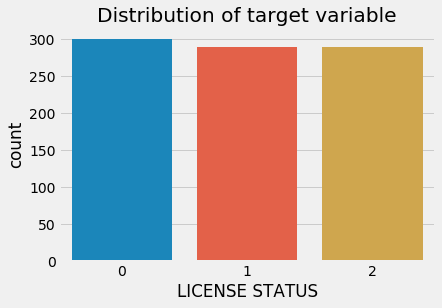

In [59]:
fig = plt.figure(figsize=(6,4))
plt.title('Distribution of target variable')
sns.countplot(new_df['LICENSE STATUS'])
plt.show()

In [60]:
new_df['LICENSE STATUS'].value_counts()

0    300
2    290
1    290
Name: LICENSE STATUS, dtype: int64

We can see from the above graph that our data is well balanced now. We will train our model on this data.

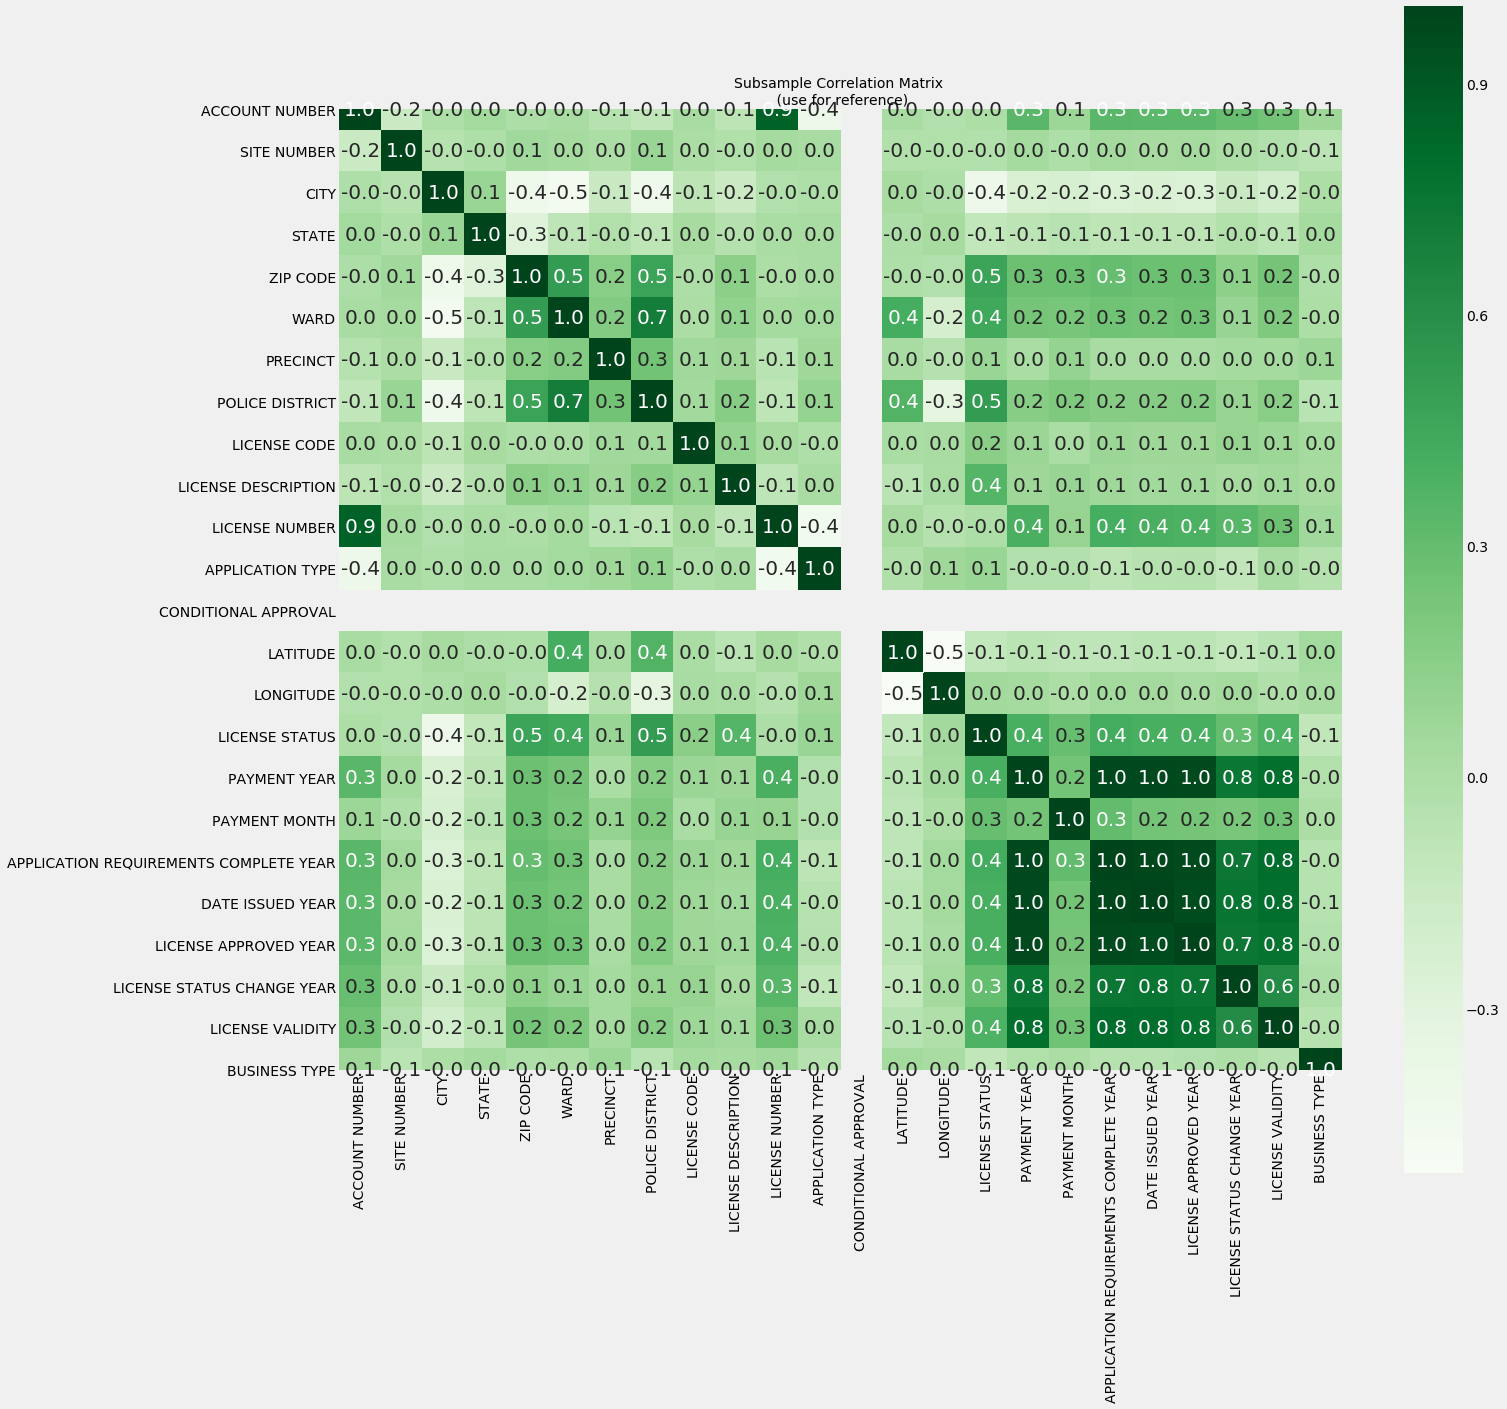

In [61]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [62]:
# Since all the years are highly correlated, we will consider the one that has the least missing values
col_list = ['PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE APPROVED YEAR']
new_df = new_df.drop(col_list, axis=1)
test_data = test_data.drop(col_list, axis=1)

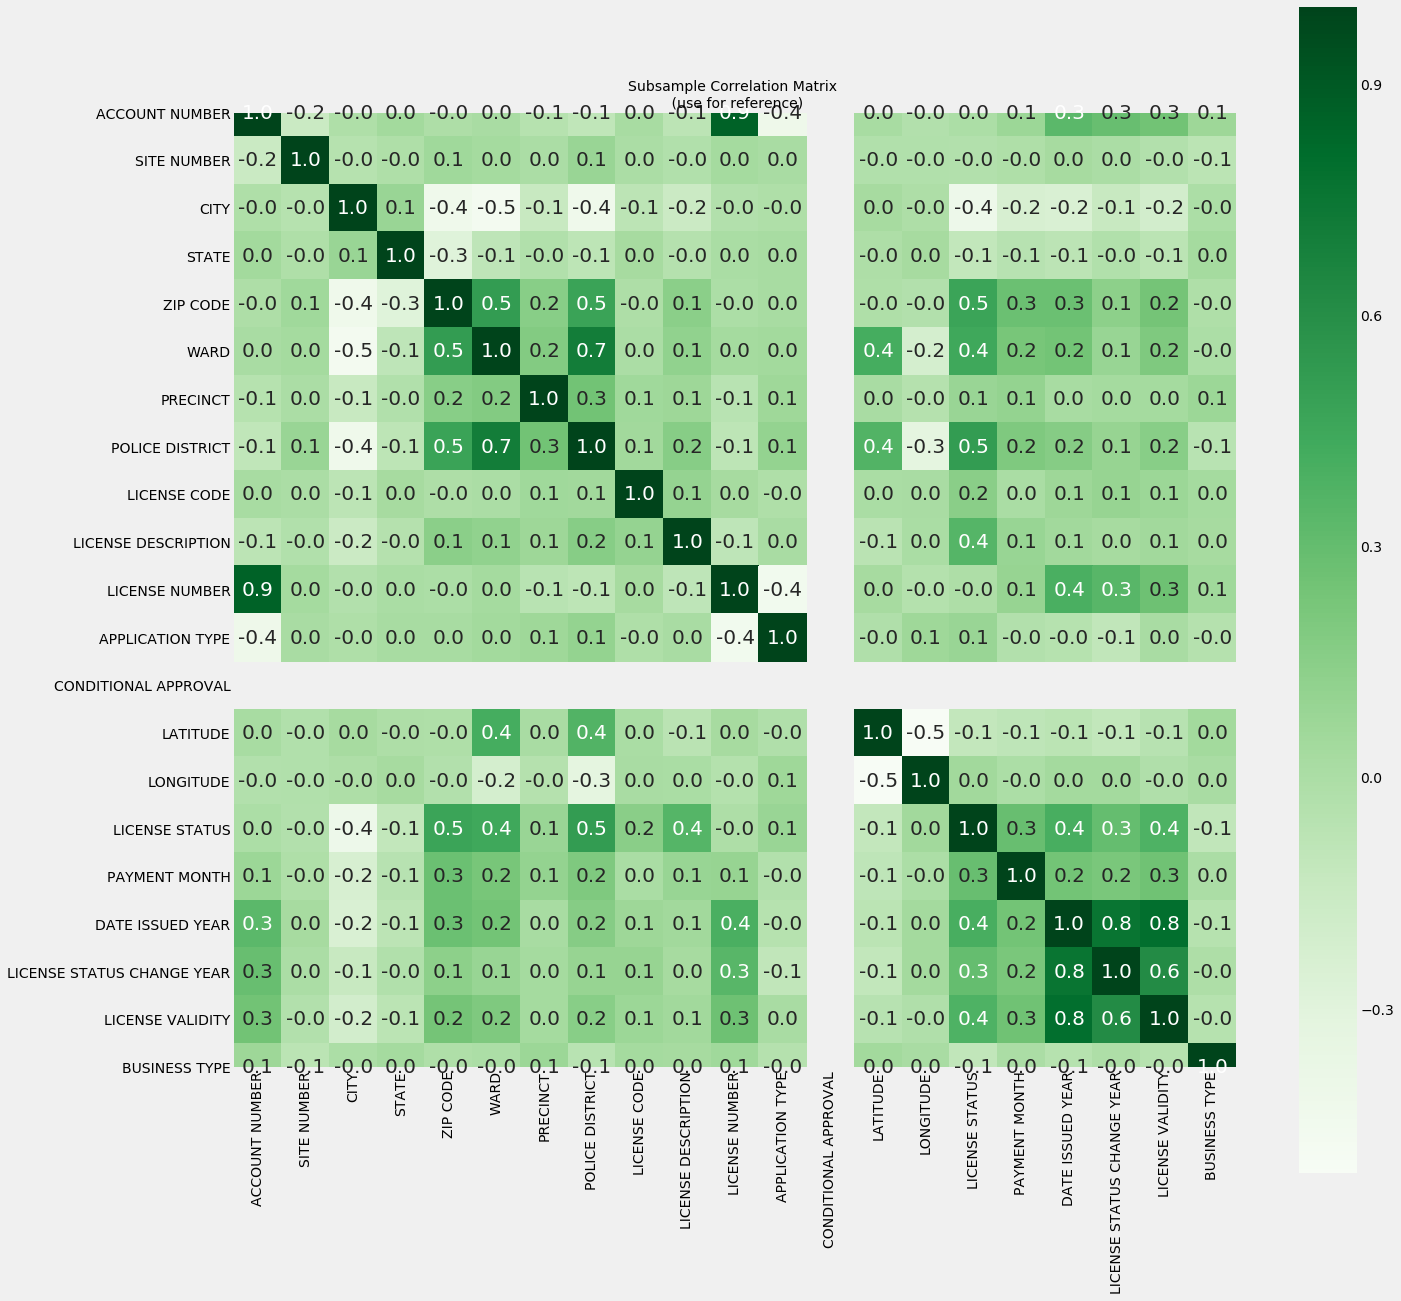

In [63]:
# Our Subsample
sub_sample_corr = new_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(sub_sample_corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap='Greens')
plt.title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [64]:
X = new_df.drop('LICENSE STATUS', axis=1)
y = new_df['LICENSE STATUS']

In [65]:
# Splitting the data into training set and testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [66]:
from IPython.core.display import display, HTML
display(HTML(f"""
   
        <ul class="list-group">
          <li class="list-group-item disabled" aria-disabled="true"><h4>Shape of Train and Test Dataset</h4></li>
          <li class="list-group-item"><h4>Number of rows in Train dataset is: <span class="label label-primary">{ X_train.shape[0]:,}</span></h4></li>
          <li class="list-group-item"> <h4>Number of columns Train dataset is <span class="label label-primary">{X_train.shape[1]}</span></h4></li>
          <li class="list-group-item"><h4>Number of rows in Test dataset is: <span class="label label-success">{ X_test.shape[0]:,}</span></h4></li>
          <li class="list-group-item"><h4>Number of columns Test dataset is <span class="label label-success">{X_test.shape[1]}</span></h4></li>
        </ul>
  
    """))

In [67]:
# A function to create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

# Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()

modelLR.fit(X_train, y_train)

y_pred = modelLR.predict(X_test)

In [76]:
from sklearn import metrics
#calculating the residuals
print('y-intercept             :' , modelLR.intercept_)
print('beta coefficients       :' , modelLR.coef_)
print('Mean Abs Error MAE      :' ,metrics.mean_absolute_error(y_test,y_pred))
print('Mean Sqrt Error MSE     :' ,metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Sqrt Error RMSE:' ,np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('r2 value                :' ,metrics.r2_score(y_test,y_pred))

y-intercept             : 176.77024057871893
beta coefficients       : [ 2.81266322e-07 -5.16845316e-03 -1.32714011e-04 -5.81433888e-03
  2.68901829e-04  5.46004104e-03 -5.22181701e-04  3.70240377e-02
  1.41183401e-04  1.02113984e-02 -6.28142497e-08  5.50029904e-02
 -1.50261747e-14 -2.86942731e+00  1.34778324e+00  9.51724018e-03
  2.03954220e-02  9.77355123e-03  2.49343954e-01 -1.82914990e-02]
Mean Abs Error MAE      : 0.4435103598717714
Mean Sqrt Error MSE     : 0.295004188232538
Root Mean Sqrt Error RMSE: 0.5431428801268944
r2 value                : 0.5556191773351999


# Logistic Regression

In [77]:

# Import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

C:\Users\AyushiBansal\Anaconda3\envs\TestEnv\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
# Prediction on test data
y_pred = logreg.predict(X_test)

In [79]:
# Calculating the accuracy, precision and the recall
acc_logreg = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_logreg )

Total Accuracy :  56.82


In [80]:
# Create confusion matrix function to find out sensitivity and specificity
from sklearn.metrics import confusion_matrix
def draw_cm(actual, predicted):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

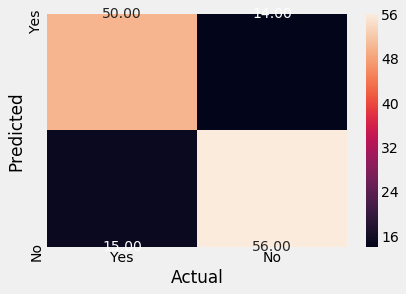

In [81]:
# Confusion matrix 
draw_cm(y_test, y_pred)

# Gaussian Naive Bayes

In [82]:
# Gaussian Naive Bayes

# Import library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
# Prediction on test set
y_pred = model.predict(X_test)

In [84]:
# Calculating the accuracy, precision and the recall
acc_nb = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_nb )

Total Accuracy :  55.3


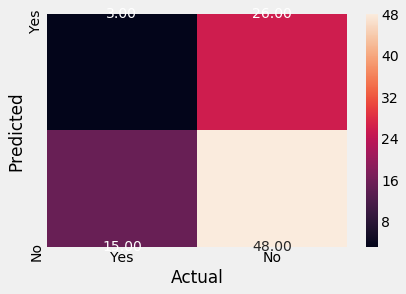

In [85]:
# Confusion matrix 
draw_cm(y_test, y_pred)

# Decision Tree Classifier

In [86]:
# Decision Tree Classifier

# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create a Decision tree classifier model
clf = DecisionTreeClassifier()

# Hyperparameter Optimization
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }
# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
X.shape

(880, 20)

In [88]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X.columns, clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

No handles with labels found to put in legend.


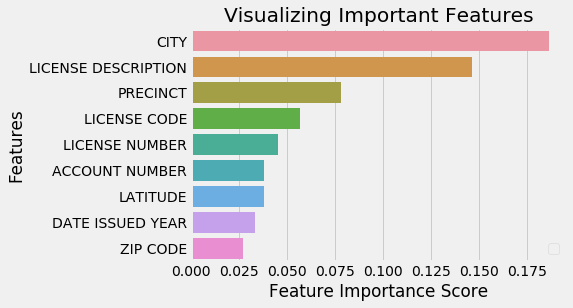

In [89]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [90]:
# Prediction on test set
y_pred = clf.predict(X_test)

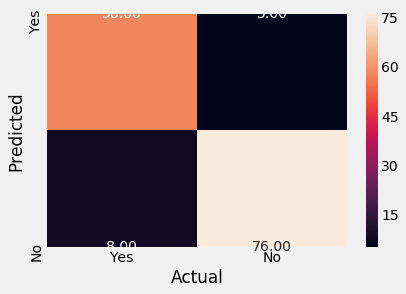

In [91]:
# Confusion matrix
draw_cm(y_test, y_pred)

In [92]:
# Calculating the accuracy, precision and the recall
acc_dt = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_dt )

Total Accuracy :  77.65


# Random Forest Classifier

In [93]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No handles with labels found to put in legend.


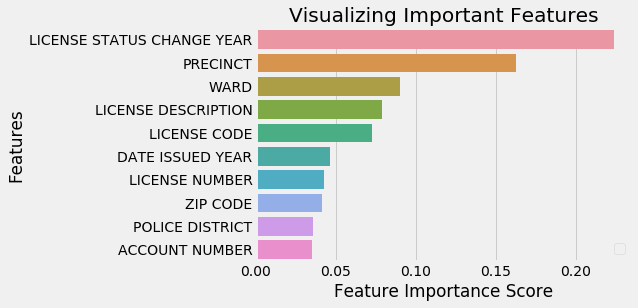

In [94]:
# Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [95]:
# Prediction on test data
y_pred = rf.predict(X_test)

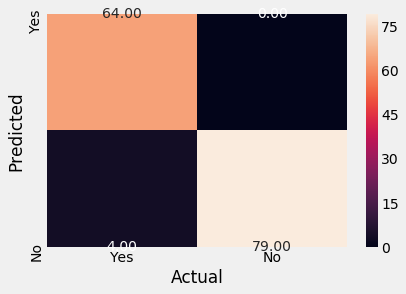

In [96]:
# Confusion metrix
draw_cm(y_test, y_pred)

In [97]:
# Calculating the accuracy, precision and the recall
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_rf )

Total Accuracy :  86.36


# SVM Classifier

In [98]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [100]:
# Prediction on test data
y_pred = svc.predict(X_test)

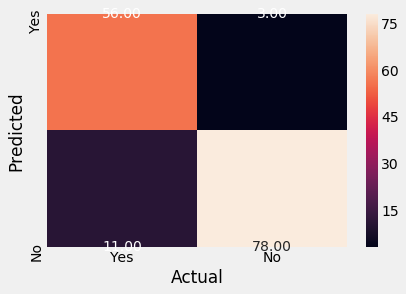

In [101]:
# Confusion Matrix
draw_cm(y_test, y_pred)

In [102]:
# Calculating the accuracy, precision and the recall
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_svm )

Total Accuracy :  77.27


# KNN

In [103]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [104]:
# Prediction on test data
y_pred = knn.predict(X_test)

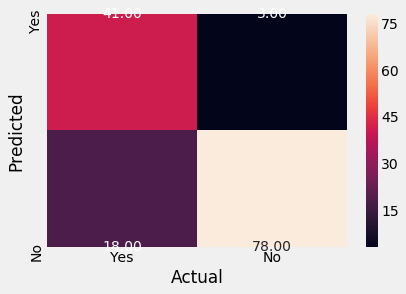

In [105]:
# Confusion Matrix
draw_cm(y_test, y_pred)

In [106]:
# Calculating the accuracy, precision and the recall
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Total Accuracy : ', acc_knn )

Total Accuracy :  75.76


# XGBoost

In [69]:
# eXtreme Gradient Boosting

# Import library of xgboost model
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import RandomizedSearchCV

# Create a XGB Classifier
gbm = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='multi:softmax', silent=True, nthread=1, num_class=3)

# A parameter grid for XGBoost for Hyperparameter Optimization
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 6]
        }

# Run the grid search
grid_obj = RandomizedSearchCV(gbm, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
gbm = grid_obj.best_estimator_

# Train the model using the training sets
gbm.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1.5,
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=1, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=0.8, verbosity=1)

In [70]:
# Prediction on test data
y_pred = gbm.predict(X_test)

In [71]:
# Calculating the accuracy, precision and the recall
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Total Accuracy : ', acc_xgb )

Total Accuracy :  88.64


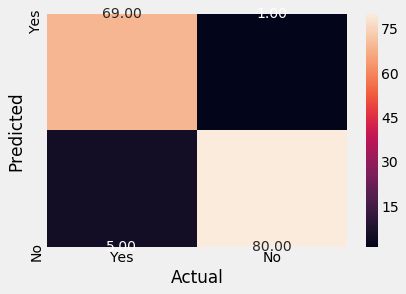

In [72]:
# Confusion matrix 
draw_cm(y_test, y_pred)

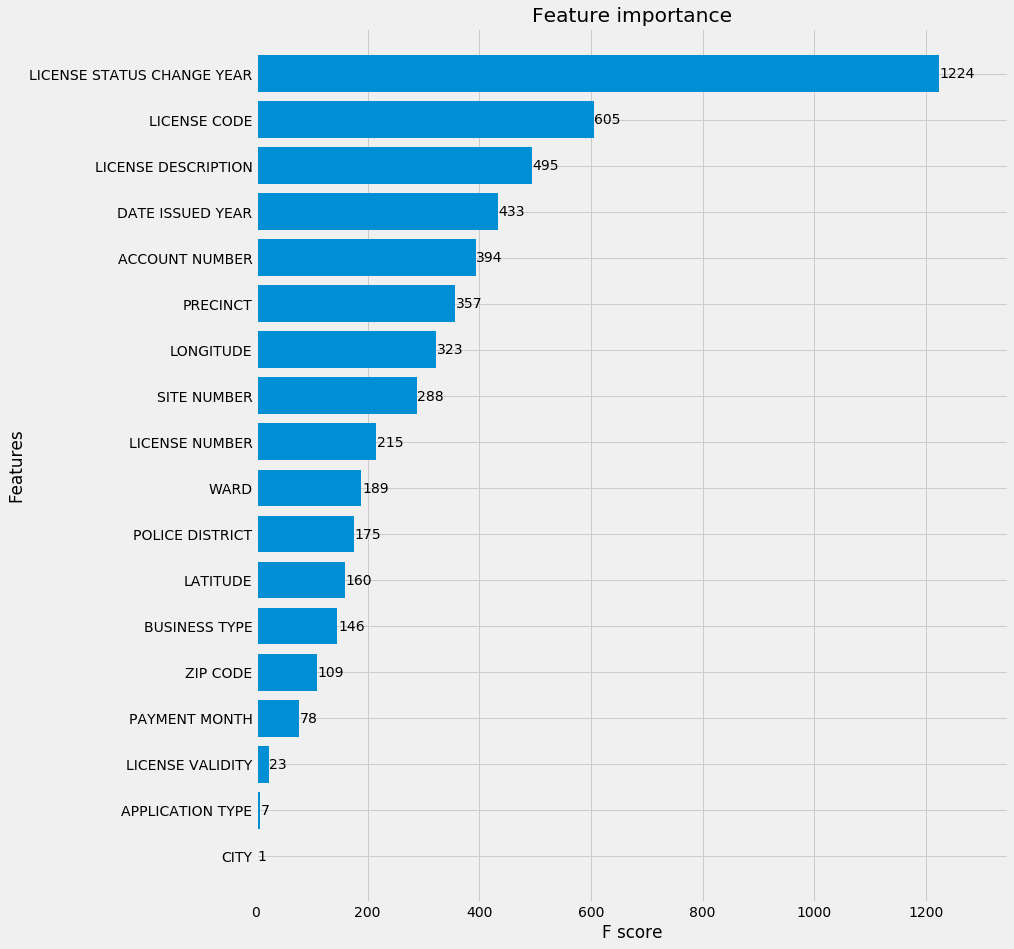

In [73]:
# Feature Engineering
fig, ax = plt.subplots(figsize=(12,15))
plot_importance(gbm, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [74]:
gbm.get_booster().get_score(importance_type="gain")

{'PRECINCT': 16.79190369977032,
 'LICENSE STATUS CHANGE YEAR': 7.530876318273699,
 'DATE ISSUED YEAR': 2.747140686101619,
 'LICENSE DESCRIPTION': 3.5566961192323223,
 'ACCOUNT NUMBER': 2.278353680439088,
 'LICENSE NUMBER': 1.9008745233674422,
 'LICENSE CODE': 3.2833824223322314,
 'APPLICATION TYPE': 1.7758838285714287,
 'SITE NUMBER': 2.663897893607638,
 'LONGITUDE': 1.6767738232383886,
 'BUSINESS TYPE': 1.64682877879452,
 'POLICE DISTRICT': 8.480824241222853,
 'WARD': 2.681565214825397,
 'LATITUDE': 1.9240601283374985,
 'ZIP CODE': 1.8082378443394516,
 'PAYMENT MONTH': 1.761132632666667,
 'LICENSE VALIDITY': 2.1255081837391305,
 'CITY': 1.63035619}

In [107]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'XGBoost'],
    'Score': [acc_logreg, acc_nb, acc_dt, acc_rf, acc_svm, acc_knn, acc_xgb]})
models.sort_values(by='Score', ascending=False)

,Model,Score
6,XGBoost,88.64
3,Random Forest,86.36
2,Decision Tree,77.65
4,Support Vector Machines,77.27
5,K - Nearest Neighbors,75.76
0,Logistic Regression,56.82
1,Naive Bayes,55.30


Selecting XGBoost as our best model because of the least underfitting and best F1-score.

In [108]:
# Predicting on the test dataset
my_pred = gbm.predict(test_data)

In [109]:
my_submission['LICENSE STATUS'] = my_pred

In [110]:
my_submission.shape

(57239, 2)

In [111]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'REV')

In [112]:
# Saving predictions to file
my_submission.to_csv('submission.csv', index=False)
print('Saved file to disk.')

Saved file to disk.
